# K-Means για TfidfVectorizer

Όπως αναφέρεται και σε αυτή τη πηγή https://stats.stackexchange.com/questions/299013/cosine-distance-as-similarity-measure-in-kmeans?fbclid=IwAR0RTJxVgh3_q39XGpEeNRzY37lyXsdcOmQTwmFPMn96y4n_OBhnEmwS1rw αν κάνουμε normalize το 
αποτέλεσμα που δίνει ο TfidfVectorizer τότε η KMeans της sklearn λειτουργεί ακριβώς όπως θα λειτουργόυσε στη 
περίπτωση που εκτελούνταν με cosine_distance αντί για euclidean_distance. Θα μπορούσα να χρησιμοποιήσω και 
την KMeansClusterer και να το κάνω έτσι, όμως ήθελα να πειραμαστιστώ λίγο με τις μεθόσους. Επίσης η KMeansClusterer
είναι αρκετά πιο αργή απο την KMeans της sklearn για μεγάλα δεδομένα.

In [8]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from string import punctuation
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
import numpy as np
import scipy
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize


my_stopwords = set(stopwords.words('english'))
other_words = {'said','say','says','just','did','was','were','year','years','like','people','tell','tells'
               'told','report','reported','get','also','however','already','may','almost','hes','ask','would',
              'could','one'}
my_stopwords = my_stopwords.union(other_words)

In [11]:
#eisagw ta dedomena gia sugkrisi
data = pd.read_csv('updated_data.tsv',sep="\t",encoding='utf-8')
X = data["content"]
#allazw ti morfi twn category apo business,tech,politics klp se ari8mous apo to 0-4
le = preprocessing.LabelEncoder()
le.fit(data["category"])
y = le.transform(data["category"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer


x = TfidfVectorizer().fit_transform(X_train.values.astype('U'))
x = normalize(x)
X_plot = x.toarray()
X_plot.shape

(8533, 30833)

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_plot)
pca_2d = pca.transform(X_plot)

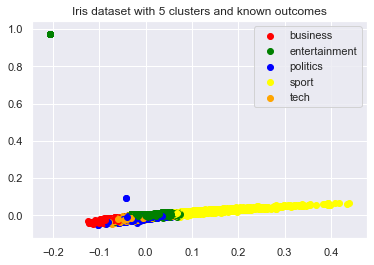

In [17]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
clusters = kmeans.predict(x)

for i in range(0, pca_2d.shape[0]):
    if clusters[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='red')
    elif clusters[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='green')
    elif clusters[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='blue')
    elif clusters[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='yellow')
    elif clusters[i] == 4:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='orange')
        
pl.legend([c1, c2, c3, c4 ,c5], ['business', 'entertainment','politics','sport','tech'])
pl.title('Iris dataset with 5 clusters and known outcomes')
pl.show()